<a href="https://colab.research.google.com/github/vinball23/H8_3/blob/main/PYTN_Assgn_1_3_KevinAnggaraPutra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library and Load Datasets**

---



In [106]:
#install kaggle
!pip install -q kaggle

In [107]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"kevinanggaraputra","key":"57f09a2516fe65867f85220c629f72e4"}'}

In [108]:
#create kaggle folder

! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [109]:
! cp kaggle.json ~/.kaggle/

In [110]:
! chmod 600 ~/.kaggle/kaggle.json

In [111]:
! kaggle datasets download -d jboysen/london-crime

london-crime.zip: Skipping, found more recently modified local copy (use --force to force download)


In [112]:
! unzip london-crime.zip

Archive:  london-crime.zip
replace london_crime_by_lsoa.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: london_crime_by_lsoa.csv  


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
df = pd.read_csv('london_crime_by_lsoa.csv')
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


# **Area Plot**


---



**Question** : Pada wilayah apa saja di kota London yang memiliki tingkat kejahatan tertinggi sepanjang tahun 2008 - 2016?

In [116]:
totals = df.drop(['lsoa_code','major_category','minor_category','month'], axis=1)
totals = totals.set_index("year").groupby('borough').sum()
totals = totals.sort_values(by='value', ascending=False).head()
totals

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024


In [117]:
total = df.drop(["lsoa_code","major_category","minor_category","month"], axis=1).set_index("borough")
total = total.loc[totals.index]
total = pd.pivot_table(total, values="value", aggfunc=np.sum, index="year", columns="borough")
total

borough,Camden,Lambeth,Newham,Southwark,Westminster
year,,,,,
2008,32010,31717,29752,33470,47846
2009,31612,31225,28610,30623,48456
2010,31804,31671,30728,31320,48116
2011,33956,33224,27978,30723,54243
2012,31472,33473,30067,30737,59226
2013,28435,31868,27577,31128,53852
2014,27198,31765,28005,28912,47564
2015,29477,33164,29217,30260,47395
2016,29183,34071,30090,31636,48330


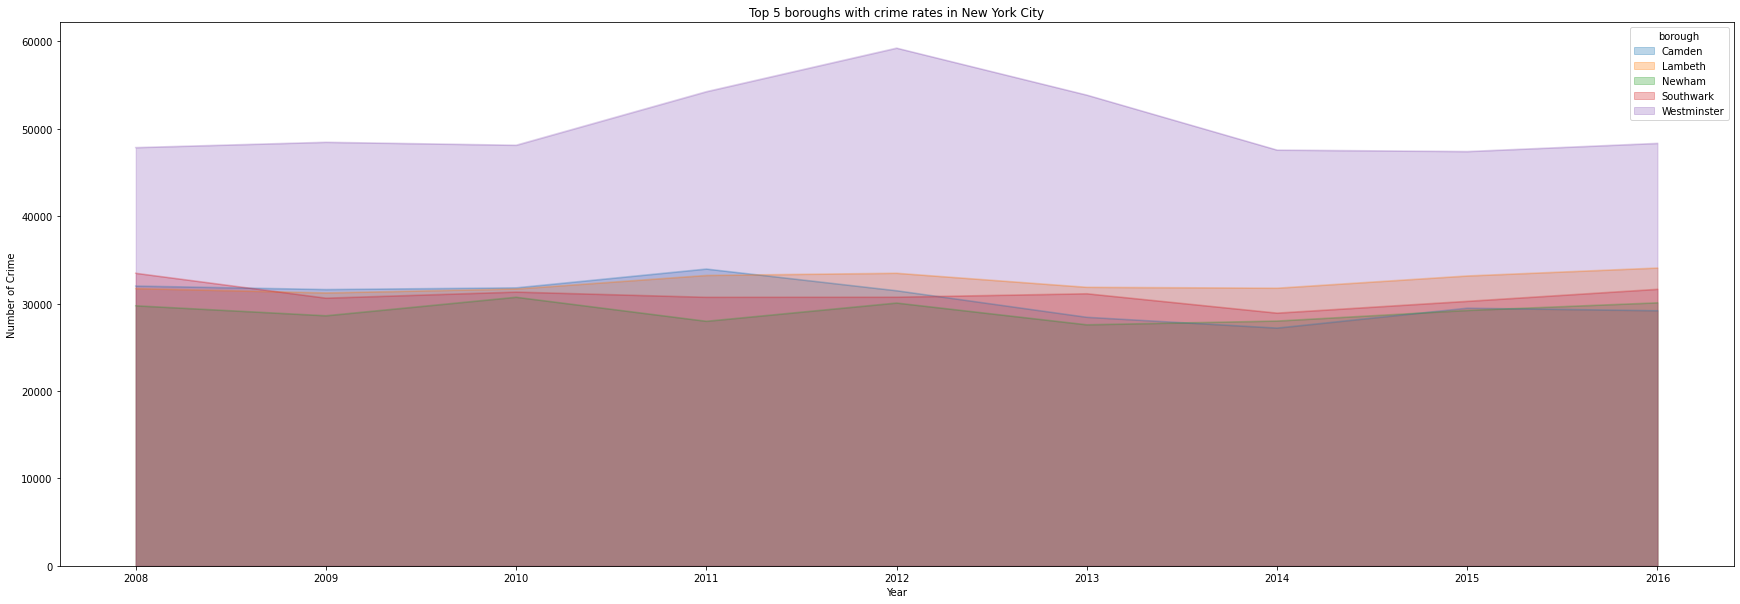

In [118]:
total.plot(kind = 'area',
           alpha = 0.3,
           stacked = False,
           figsize = (30,10))
plt.title('Top 5 boroughs with crime rates in New York City')
plt.ylabel('Number of Crime')
plt.xlabel('Year')
plt.show()

# **Bar Chart**
---



**Question** : Total angka kejahatan di wilayah kota London sepanjang tahun 2008 - 2016?

In [119]:
total_crime = df.drop(['lsoa_code','major_category','minor_category','month'], axis=1)
total_crime = total_crime.groupby('year').sum()
total_crime

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


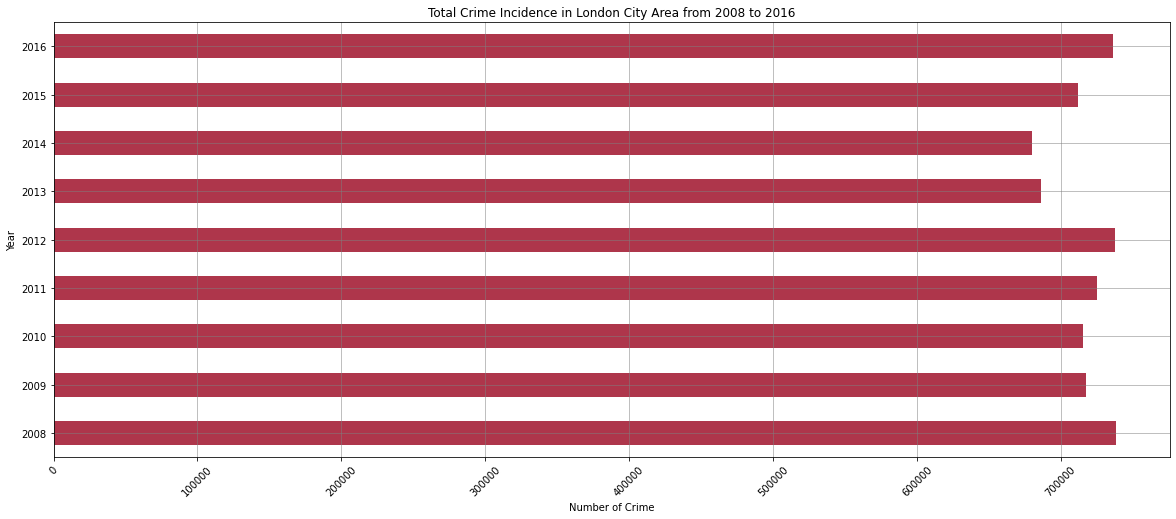

In [120]:
total_crime.plot(kind = 'barh',
                 alpha = 0.8,
                 stacked = 'True',
                 legend = False,
                 figsize = (20,8),
                 color = '#9a031e')
plt.title('Total Crime Incidence in London City Area from 2008 to 2016')
plt.xlabel('Number of Crime')
plt.ylabel('Year')
plt.grid(color = "grey", linewidth = 0.5)
plt.xticks(rotation = 45)
plt.show()

**Question** : Pada wilayah apa saja di kota London yang memiliki tingkat kejahatan tertinggi sepanjang tahun 2008 - 2016?

In [121]:
df['borough'].unique()

array(['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth',
       'Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth',
       'Richmond upon Thames', 'Hillingdon', 'Havering',
       'Barking and Dagenham', 'Kingston upon Thames', 'Westminster',
       'Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark',
       'Barnet', 'Waltham Forest', 'Camden', 'Bexley',
       'Kensington and Chelsea', 'Islington', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Merton', 'City of London'], dtype=object)

In [122]:
top3_population = ['Croydon', 'Barnet', 'Ealing']
top3_total = df.drop(['lsoa_code','major_category', 'minor_category', 'month', ], axis = 1)
top3_total = top3_total[top3_total['borough'].isin(top3_population)]
top3_total = top3_total.set_index('year').groupby('borough').sum()
top3_total = top3_total.sort_values(by='value', ascending=False).head()
top3_total

,value
borough,
Croydon,260294
Ealing,251562
Barnet,212191


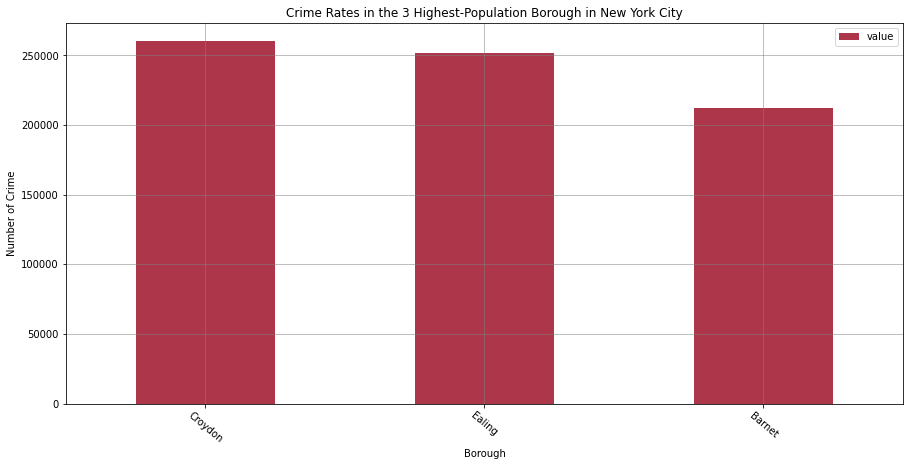

In [123]:
top3_total.plot(kind = "bar",
                  alpha = 0.8,
                  stacked = "unstacked",
                  figsize = (15,7),
                  color = '#9a031e')
plt.title('Crime Rates in the 3 Highest-Population Borough in New York City')
plt.ylabel('Number of Crime')
plt.xlabel('Borough')
plt.grid(color = "grey", linewidth = 0.5)
plt.xticks(rotation=-40)
plt.show()

# **Pie Chart**

---



**Question** : Akumulasi jenis Major Crime sepanjang tahun 2008 - 2016?

In [124]:
total_cMajor = df.drop(['lsoa_code', 'borough', 'minor_category', 'year', 'month' ], axis = 1).groupby('major_category').sum()
total_cMajor['value'].to_numpy()
total_cMajor

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


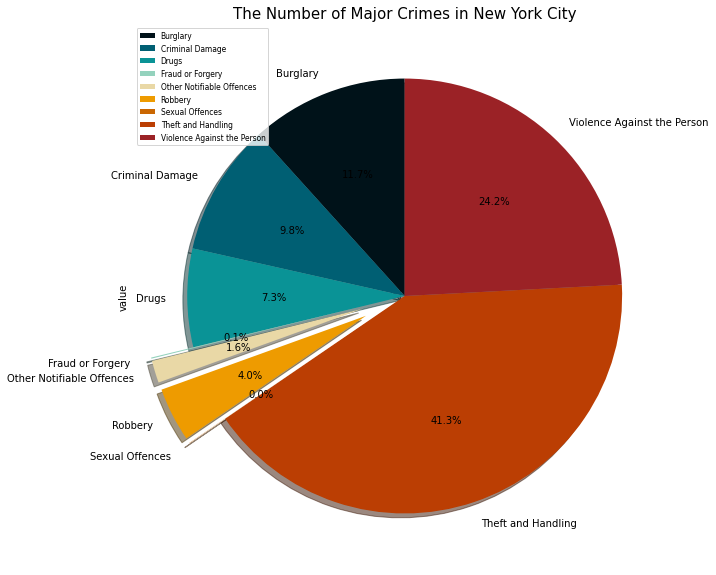

In [125]:
popup_list = [0,0,0,0.2,0.2,0.2,0.2,0,0]
color_list = ['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6', '#ee9b00', '#ca6702', '#bb3e03', '#9b2226']
total_cMajor.plot(kind = 'pie',
                figsize = (20,10),
                autopct = '%1.1f%%',
                shadow = True,
                startangle = 90,
                explode = popup_list,
                colors = color_list,
                subplots = 'True')
plt.title("The Number of Major Crimes in New York City", fontsize=15)
plt.legend(labels = total_cMajor.index, loc="upper left", prop={"size":7.5})
plt.grid(color="grey", linewidth=0.5)
plt.show()

# **Histogram**

---



**Question** : Pada wilayah apa saja di kota London yang memiliki tingkat kejahatan tertinggi sepanjang tahun 2008 - 2016?

In [126]:
total_cMajor

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


In [127]:
count, bin_edges = np.histogram(total_cMajor)
print(count)
print(bin_edges)

[4 1 2 0 0 1 0 0 0 1]
[1.2730000e+03 2.6733180e+05 5.3339060e+05 7.9944940e+05 1.0655082e+06
 1.3315670e+06 1.5976258e+06 1.8636846e+06 2.1297434e+06 2.3958022e+06
 2.6618610e+06]


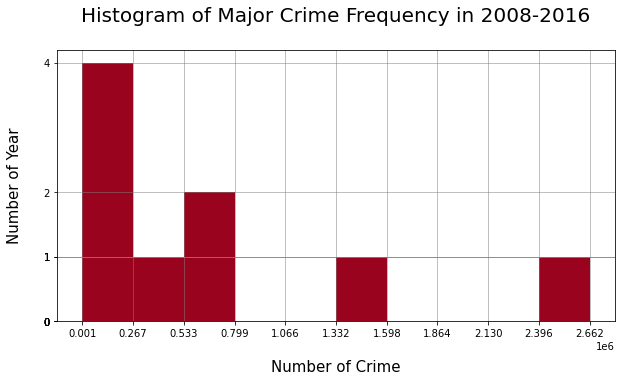

In [128]:
total_cMajor.plot(kind = 'hist',
                  figsize = (10,5),
                  xticks = bin_edges,
                  yticks = count,
                  legend = False,
                  color = '#9a031e')
plt.title("Histogram of Major Crime Frequency in 2008-2016\n", fontsize=20)
plt.xlabel("\nNumber of Crime", fontsize=15)
plt.ylabel("Number of Year\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.show()

# **Box Plot**

---



**Question** : Bagaimana distribusi statistik dari data jumlah kasus kejahatan di London tahun 2008-2016?

In [129]:
total_crime

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [130]:
total_crime.describe()

,value
count,9.000000
mean,716417.555556
std,21301.370555
min,680183.000000
25%,711624.000000
50%,717214.000000
75%,736121.000000
max,738641.000000


Text(0.5, 1.0, 'Box Plot Number of Crime from 2008 - 2016')

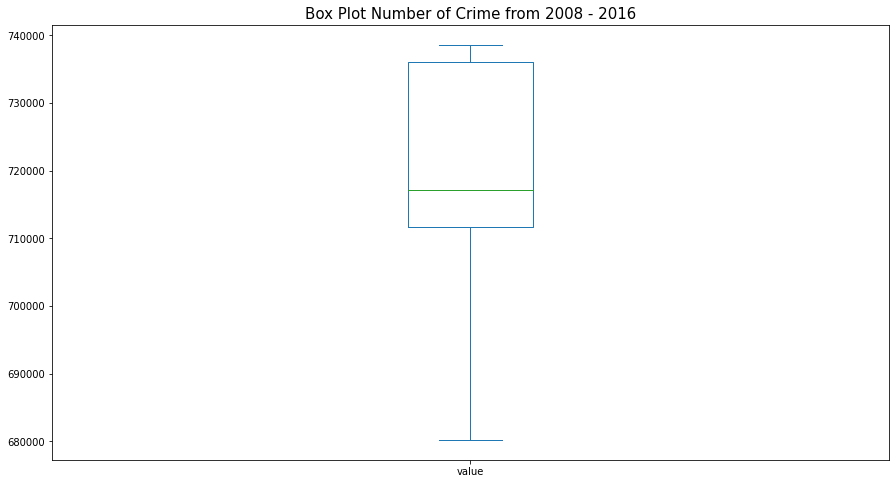

In [131]:
total_crime.plot(kind = 'box',
                figsize = (15,8))
plt.title('Box Plot Number of Crime from 2008 - 2016', fontsize = 15)

# **Scatter Plot**

---



**Question** : Pada bulan apa kejahatan di London mencapai angka tertinggi selama tahun 2008-2016?

In [132]:
month_crime = df.drop(["lsoa_code","borough","major_category","minor_category","year"], axis=1)
month_crime = month_crime.groupby("month").sum()
month_crime = month_crime.reset_index()
month_crime

,month,value
0,1,530247
1,2,500537
2,3,551795
3,4,520648
4,5,552704
5,6,549041
6,7,563076
7,8,532784
8,9,522377
9,10,558252


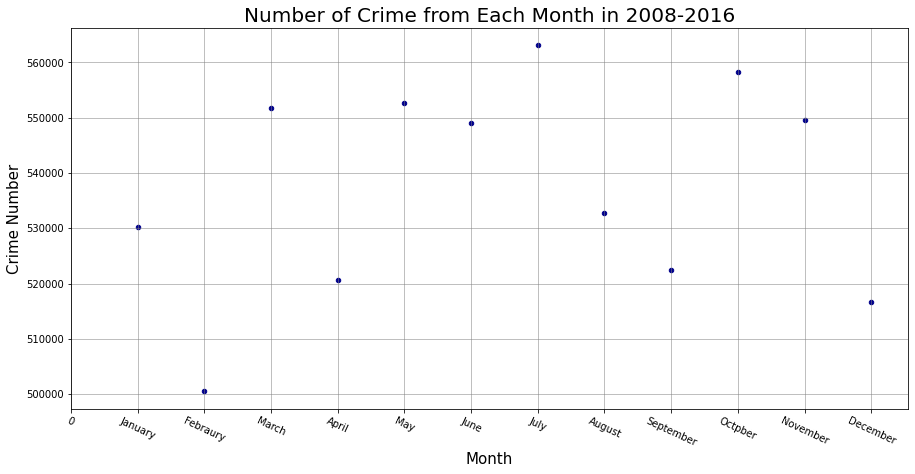

In [133]:
months = np.arange(len(month_crime["month"])+1)
name_of_months=['0','January','Febraury','March','April','May','June','July','August','September','Octpber','November','December']

month_crime.plot(kind="scatter", x="month",y="value",figsize=(15,7), color="darkblue")
plt.title("Number of Crime from Each Month in 2008-2016", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Crime Number", fontsize=15)
plt.xticks(months, name_of_months, rotation = -25)
plt.grid(color="grey", linewidth=0.5)
plt.show()

# **Folium Maps**

---



In [134]:
import folium

In [135]:
fm = folium.Map(location=[51.509865, -0.118092], zoom_start=15)
fm

# **Word Clouds**

---



In [136]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [137]:
stopwords = set(STOPWORDS)

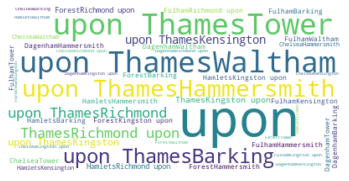

In [138]:
text = df['borough']

wordcloud = WordCloud(stopwords=stopwords,  background_color="white").generate(''.join(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()